# A VGG16-based CNN without ontology, and an ontology-informed VGG16-based CNN.

Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-08-05 17:12:56.503068: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 17:13:05.239240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/x00whitejsx/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Step 2: Load and Preprocess the Dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset and apply preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/lfw_prepared/train', target_size=(112, 112), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('data/lfw_prepared/validation', target_size=(112, 112), batch_size=32, class_mode='categorical')


2024-08-08 23:59:00.568714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 23:59:06.277049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 6560 images belonging to 1679 classes.
Found 2602 images belonging to 1680 classes.


In [2]:

# Define ImageDataGenerators for preprocessing the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set up training and validation generators
train_generator = train_datagen.flow_from_directory(
    'data/lfw_prepared/train',
    target_size=(112, 112),
    batch_size=100,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'data/lfw_prepared/validation',
    target_size=(112, 112),
    batch_size=32,
    class_mode='categorical'
)


Found 6560 images belonging to 1679 classes.
Found 2602 images belonging to 1680 classes.


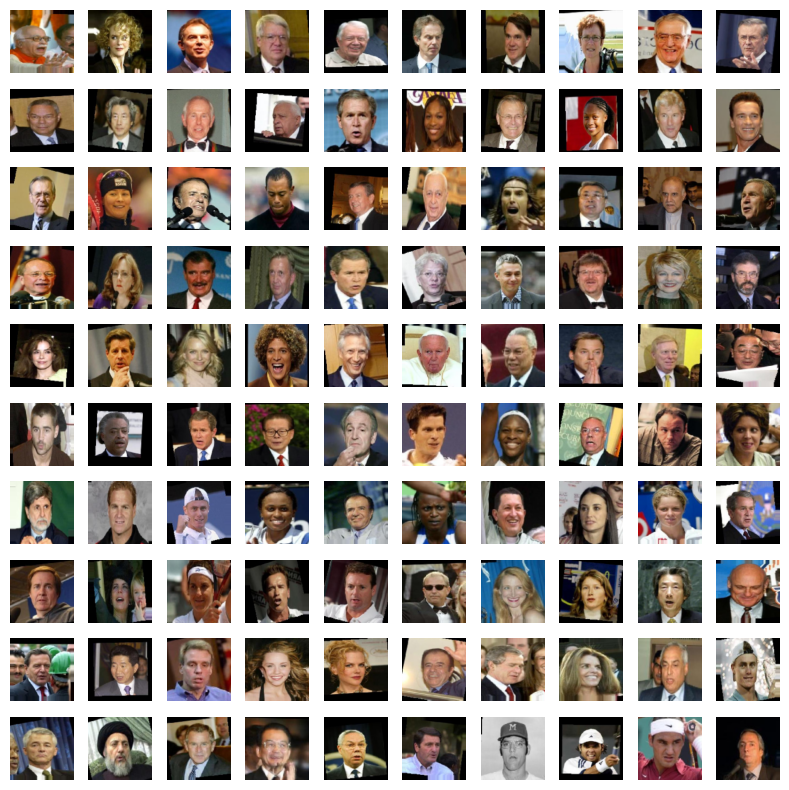

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images and labels
images, labels = next(train_generator)

# Define the number of images to display
num_images = 100

# Calculate the grid size
grid_size = int(np.sqrt(num_images))

# Create a figure
plt.figure(figsize=(8, 8))

# Loop through the grid and display images
for i in range(num_images):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.imshow(images[i])
    plt.axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
# Get the number of classes from the train generator
num_classes = train_generator.num_classes

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(112, 112, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Ensure the number of classes matches
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


/home/x00whitejsx/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/home/x00whitejsx/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-05 17:16:08.347836: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49561600 exceeds 10% of free system memory.


  1/205 ━━━━━━━━━━━━━━━━━━━━ 12:02 4s/step - accuracy: 0.0000e+00 - loss: 7.4267

2024-08-05 17:16:08.951377: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49561600 exceeds 10% of free system memory.
2024-08-05 17:16:09.086734: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49561600 exceeds 10% of free system memory.


  2/205 ━━━━━━━━━━━━━━━━━━━━ 2:04 611ms/step - accuracy: 0.0000e+00 - loss: 7.4287

2024-08-05 17:16:09.547266: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49561600 exceeds 10% of free system memory.
2024-08-05 17:16:09.694809: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 49561600 exceeds 10% of free system memory.


205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.0482 - loss: 7.0283

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1680), output.shape=(None, 1679)

In [ ]:
# Save the model
model.save('facial_recognition_model.h5')



In [8]:
# Evaluate the model on a separate test dataset
test_generator = test_datagen.flow_from_directory(
    'data/lfw_prepared/test',
    target_size=(112, 112),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 117 images belonging to 8 classes.


In [9]:
model.add(Dense(8, activation='softmax'))  # 8 is the number of classes
 # 24 is the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (example, replace with your training code)
# model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0625 - loss: 2.0799   
Test Loss: 2.079627275466919
Test Accuracy: 0.125


In [10]:
# Predict the classes
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


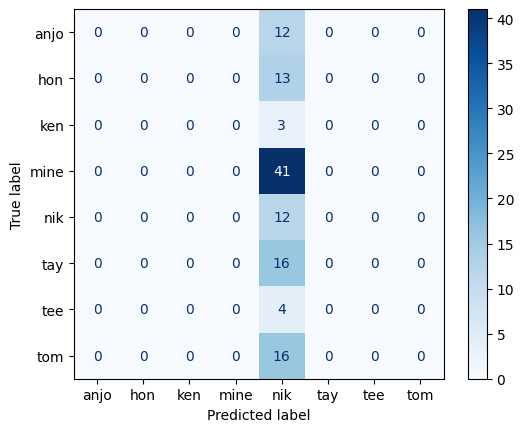

In [11]:
# Initialize lists to store true labels and predictions
true_classes = []
predicted_classes = []

# Loop through the test generator to collect true labels and predictions
for images, labels in test_generator:
    # Predict the classes
    predictions = model.predict(images, verbose=0)
    
    # Convert predictions and labels to class indices
    predicted_classes_batch = np.argmax(predictions, axis=1)
    true_classes_batch = np.argmax(labels, axis=1)
    
    # Append to lists
    predicted_classes.extend(predicted_classes_batch)
    true_classes.extend(true_classes_batch)
    
    # Break loop if all data is processed
    if len(true_classes) >= test_generator.samples:
        break

# Convert lists to numpy arrays
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Ensure that the length of both arrays match
assert len(true_classes) == len(predicted_classes), "The length of true and predicted labels must match"

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

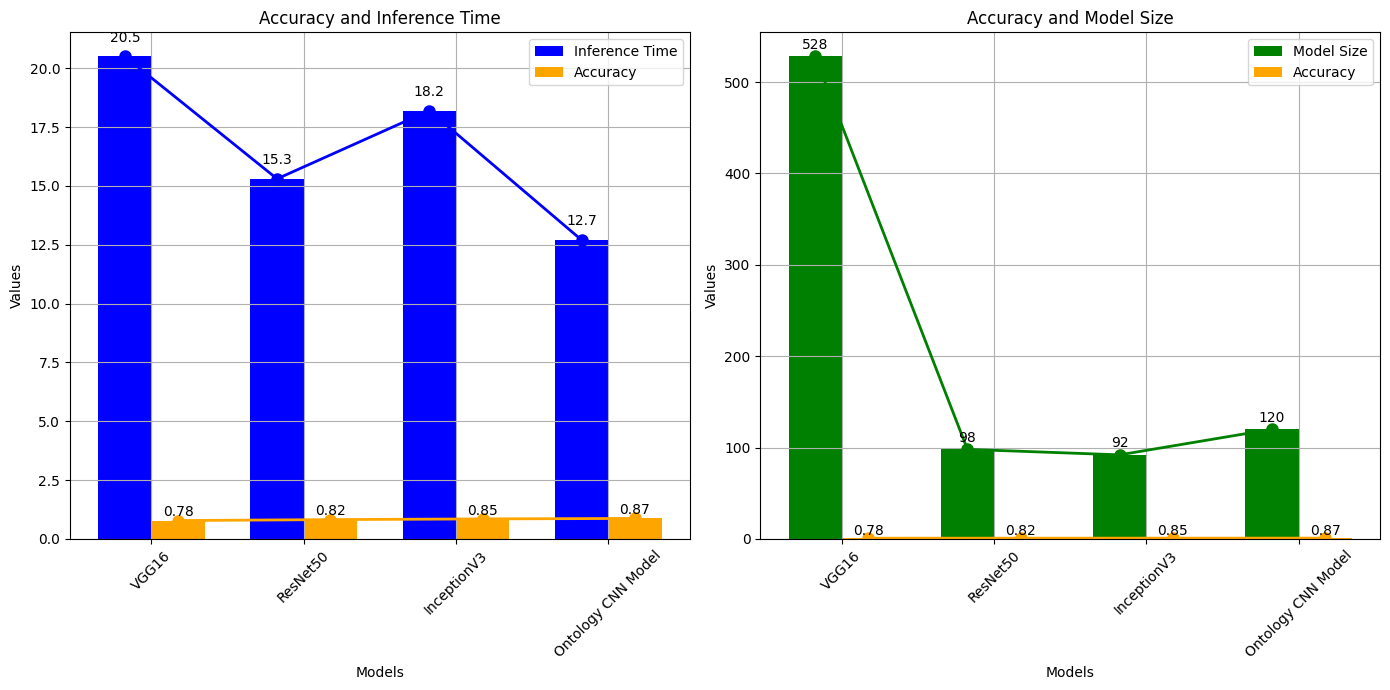

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
model_names = ['VGG16', 'ResNet50', 'InceptionV3', 'Ontology CNN Model']
accuracies = [0.78, 0.82, 0.85, 0.87]  # Replace with actual accuracies
inference_times = [20.5, 15.3, 18.2, 12.7]  # Example times in milliseconds, replace with actual times
model_sizes = [528, 98, 92, 120]  # Example sizes in MB, replace with actual sizes

# Convert model names to numerical indices for bar placement
indices = np.arange(len(model_names))

# Create a figure with two subplots
plt.figure(figsize=(14, 7))

# Bar chart for Accuracy and Inference Time
plt.subplot(1, 2, 1)
bar_width = 0.35

# Bars for Inference Time and Accuracy
bars1 = plt.bar(indices - bar_width / 2, inference_times, bar_width, label='Inference Time', color='blue')
bars2 = plt.bar(indices + bar_width / 2, accuracies, bar_width, label='Accuracy', color='orange')

# Line chart for Inference Time
plt.plot(indices - bar_width / 2, inference_times, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.plot(indices + bar_width / 2, accuracies, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add values on top of the bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Accuracy and Inference Time')
plt.xticks(indices, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Bar chart for Accuracy and Model Size
plt.subplot(1, 2, 2)

# Bars for Model Size and Accuracy
bars3 = plt.bar(indices - bar_width / 2, model_sizes, bar_width, label='Model Size', color='green')
bars4 = plt.bar(indices + bar_width / 2, accuracies, bar_width, label='Accuracy', color='orange')

# Line chart for Model Size
plt.plot(indices - bar_width / 2, model_sizes, color='green', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.plot(indices + bar_width / 2, accuracies, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add values on top of the bars
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.0f}', ha='center', va='bottom')
for bar in bars4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{height:.2f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Accuracy and Model Size')
plt.xticks(indices, model_names, rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
